In this Notebook we will review the data downloaded from the International Seismic Center: https://www.isc.ac.uk/iscbulletin/search/catalogue/

Reference video: https://www.youtube.com/watch?v=pJTYG_D5X5M


# Start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 40.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import contextily as cx #para el basemap en geopandas
import xyzservices.providers as xyz #para escoger el basemap
import geopandas as gpd

from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Para evaluar el modelo
from sklearn.neural_network import MLPClassifier # Para la Red Neuronal
from joblib import dump, load # guardar el modelo
from datetime import datetime, timedelta
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression # Para generar el Modelo de Reg. Lineal
from matplotlib.patches import Rectangle # Para hacer los rectangulos
from matplotlib.collections import PatchCollection # Tambien para los rectangulos
import matplotlib.colors as colors

In [ ]:
pathDatos = '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/Catalogos/'
pathDatosISC = '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/Catalogo_ISC/'
pathSaveFiguras = '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/FigurasV7/'

## DF ISGC

In [ ]:
# Se carga el catalogo de los eventos de prof mayores a 100 km
df_ISC = pd.read_csv(pathDatosISC+'Catalogo_ISC.csv', decimal=',', delimiter=';')
df_ISC['DATE      '] = pd.to_datetime(df_ISC['DATE      '], dayfirst=True)
df_ISC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11434 entries, 0 to 11433
Data columns (total 75 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0     EVENTID    11434 non-null  int64         
 1   TYPE         11434 non-null  object        
 2   AUTHOR       11434 non-null  object        
 3   DATE         11434 non-null  datetime64[ns]
 4   TIME         11434 non-null  object        
 5   LAT          11434 non-null  float64       
 6   LON          11434 non-null  float64       
 7   DEPTH        11434 non-null  float64       
 8   DEPFIX       11434 non-null  object        
 9   AUTHOR   .1  11434 non-null  object        
 10  TYPE         11434 non-null  object        
 11  MAG          11434 non-null  float64       
 12  autho2       8213 non-null   object        
 13  type2        8213 non-null   object        
 14  mag2         8213 non-null   float64       
 15  Unnamed: 15  3696 non-null   object        
 16  Unna

<ipython-input-38-acd6e88e72b2>:2: DtypeWarning: Columns (66,67,69,70,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ISC = pd.read_csv(pathDatosISC+'Catalogo_ISC.csv', decimal=',', delimiter=';')


In [ ]:
df_ISC.head()

,EVENTID,TYPE,AUTHOR,DATE,TIME,LAT,LON,DEPTH,DEPFIX,AUTHOR .1,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
0,872044,ke,CAR,1963-03-27,12:31:45,6.8000,-73.0000,176.0,,ALQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,871095,ke,ISC,1964-01-06,"06:42,5",6.7479,-72.8340,161.0,TRUE,ISC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,871104,ke,ISC,1964-01-07,"22:09,1",6.7738,-72.8809,160.0,TRUE,ISC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,871198,ke,ISC,1964-01-11,"57:58,9",6.9645,-73.1024,130.0,TRUE,ISC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871531,ke,ISC,1964-01-26,"53:19,8",6.7786,-72.9524,161.0,TRUE,ISC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_ISC.columns

Index(['  EVENTID', 'TYPE', 'AUTHOR   ', 'DATE      ', 'TIME       ',
       'LAT     ', 'LON      ', 'DEPTH', 'DEPFIX', 'AUTHOR   .1', 'TYPE  ',
       'MAG ', 'autho2', 'type2', 'mag2', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed

In [ ]:
df_ISC = df_ISC[['  EVENTID', 'TYPE', 'AUTHOR   ', 'DATE      ', 'TIME       ',
                 'LAT     ', 'LON      ', 'DEPTH', 'DEPFIX', 'AUTHOR   .1', 'TYPE  ',
                 'MAG ', 'autho2', 'type2', 'mag2']]
df_ISC.head()

,EVENTID,TYPE,AUTHOR,DATE,TIME,LAT,LON,DEPTH,DEPFIX,AUTHOR .1,TYPE,MAG,autho2,type2,mag2
0,872044,ke,CAR,1963-03-27,12:31:45,6.8000,-73.0000,176.0,,ALQ,M,4.5,NaN,NaN,NaN
1,871095,ke,ISC,1964-01-06,"06:42,5",6.7479,-72.8340,161.0,TRUE,ISC,mb,4.1,USCGS,mb,4.5
2,871104,ke,ISC,1964-01-07,"22:09,1",6.7738,-72.8809,160.0,TRUE,ISC,mb,4.0,USCGS,mb,4.2
3,871198,ke,ISC,1964-01-11,"57:58,9",6.9645,-73.1024,130.0,TRUE,ISC,mb,3.9,NaN,NaN,NaN
4,871531,ke,ISC,1964-01-26,"53:19,8",6.7786,-72.9524,161.0,TRUE,ISC,mb,3.9,USCGS,mb,3.8


## DF SGC

In [ ]:
# Se carga el catalogo de los eventos de prof mayores a 100 km
df_todos = pd.read_csv(pathDatos+'df_Total_1994_2024.csv')
df_todos['Date-Time'] = pd.to_datetime(df_todos['Date-Time'], yearfirst=True)
df_todos.dropna(inplace=True)
df_todos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148910 entries, 0 to 148985
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   FECHA                   148910 non-null  object        
 1   HORA_UTC                148910 non-null  object        
 2   LATITUD (grados)        148910 non-null  float64       
 3   LONGITUD (grados)       148910 non-null  float64       
 4   PROFUNDIDAD (Km)        148910 non-null  float64       
 5   MAGNITUD Ml             148910 non-null  float64       
 6   ERROR LATITUD (Km)      148910 non-null  float64       
 7   ERROR LONGITUD (Km)     148910 non-null  float64       
 8   ERROR PROFUNDIDAD (Km)  148910 non-null  float64       
 9   Date-Time               148910 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 12.5+ MB


In [ ]:
df_todos_ml25 = df_todos[df_todos['MAGNITUD Ml']>=2.5]
df_todos_ml25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31985 entries, 0 to 148985
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   FECHA                   31985 non-null  object        
 1   HORA_UTC                31985 non-null  object        
 2   LATITUD (grados)        31985 non-null  float64       
 3   LONGITUD (grados)       31985 non-null  float64       
 4   PROFUNDIDAD (Km)        31985 non-null  float64       
 5   MAGNITUD Ml             31985 non-null  float64       
 6   ERROR LATITUD (Km)      31985 non-null  float64       
 7   ERROR LONGITUD (Km)     31985 non-null  float64       
 8   ERROR PROFUNDIDAD (Km)  31985 non-null  float64       
 9   Date-Time               31985 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 2.7+ MB


# Geopandas SGC

In [ ]:
puntosSismos = gpd.points_from_xy( df_todos_ml25['LONGITUD (grados)'],
                                  df_todos_ml25['LATITUD (grados)'],
                                  crs='epsg:4326')
puntosSismos

<GeometryArray>
[ <POINT (-72.95 6.839)>, <POINT (-72.912 6.877)>, <POINT (-72.898 6.806)>,
 <POINT (-73.095 6.898)>, <POINT (-73.201 6.736)>, <POINT (-73.016 6.713)>,
 <POINT (-73.039 6.813)>, <POINT (-73.023 6.786)>, <POINT (-73.135 7.053)>,
 <POINT (-73.049 6.783)>,
 ...
 <POINT (-73.162 6.763)>, <POINT (-73.153 6.803)>, <POINT (-73.166 6.803)>,
  <POINT (-73.192 6.82)>, <POINT (-73.179 6.801)>, <POINT (-73.179 6.776)>,
 <POINT (-73.196 6.778)>, <POINT (-73.138 6.772)>, <POINT (-73.076 6.769)>,
 <POINT (-73.124 6.773)>]
Length: 31985, dtype: geometry

<Axes: >

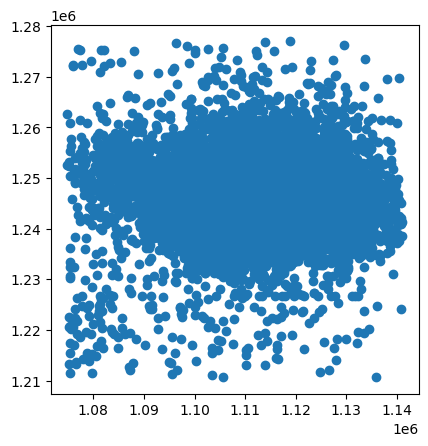

In [ ]:
gdfSGC = gpd.GeoDataFrame(data= df_todos_ml25, geometry=puntosSismos)
gdfSGC.to_crs(epsg='3116', inplace=True)
gdfSGC.plot()

In [ ]:
gdfSGC['X'] = gdfSGC.get_coordinates()['x']
gdfSGC['Y'] = gdfSGC.get_coordinates()['y']

# Geopandas ISC

In [ ]:
df_ISC.describe()

,EVENTID,DATE,LAT,LON,DEPTH,MAG,mag2
count,1.143400e+04,11434,11434.000000,11434.000000,11434.000000,11434.000000,8213.000000
mean,2.642840e+08,2005-05-13 06:48:10.327094400,6.819566,-73.077117,151.958037,3.371069,3.454389
min,6.044300e+04,1963-03-27 00:00:00,6.502100,-73.400000,0.000000,0.800000,1.000000
25%,1.209006e+07,1998-07-17 06:00:00,6.797000,-73.122000,147.100000,3.000000,3.000000
50%,3.019475e+08,2007-05-02 00:00:00,6.821000,-73.081000,152.300000,3.400000,3.400000
75%,6.027485e+08,2011-10-10 18:00:00,6.845000,-73.034000,157.700000,3.800000,3.900000
max,6.368794e+08,2022-05-31 00:00:00,7.097300,-72.800700,223.300000,6.200000,7.200000
std,2.538252e+08,NaN,0.049983,0.074273,10.991077,0.654787,0.667305


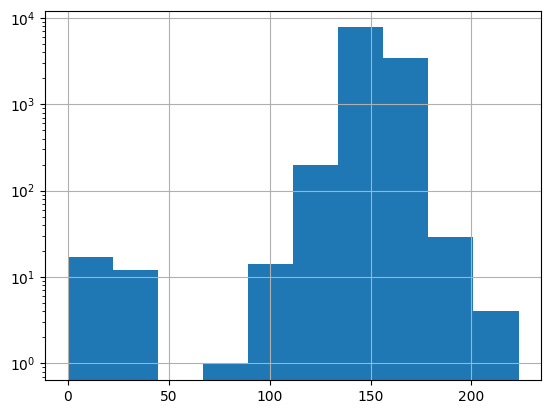

In [ ]:
plt.figure()
df_ISC['DEPTH'].hist()
plt.yscale('log')
plt.show()

In [ ]:
df_ISC.columns

Index(['  EVENTID', 'TYPE', 'AUTHOR   ', 'DATE      ', 'TIME       ',
       'LAT     ', 'LON      ', 'DEPTH', 'DEPFIX', 'AUTHOR   .1', 'TYPE  ',
       'MAG ', 'autho2', 'type2', 'mag2'],
      dtype='object')

In [ ]:
puntosSismos = gpd.points_from_xy( df_ISC['LON      '],
                                  df_ISC['LAT     '],
                                  crs='epsg:4326')
puntosSismos

<GeometryArray>
[      <POINT (-73 6.8)>, <POINT (-72.834 6.748)>, <POINT (-72.881 6.774)>,
 <POINT (-73.102 6.964)>, <POINT (-72.952 6.779)>, <POINT (-72.942 6.765)>,
 <POINT (-72.924 6.763)>, <POINT (-73.297 6.782)>, <POINT (-73.085 7.054)>,
 <POINT (-72.821 7.024)>,
 ...
   <POINT (-73.16 6.79)>,  <POINT (-73.13 6.863)>,    <POINT (-73.2 6.77)>,
 <POINT (-73.081 6.851)>,   <POINT (-73.37 6.67)>, <POINT (-73.118 6.879)>,
 <POINT (-73.102 6.783)>, <POINT (-73.132 6.851)>, <POINT (-73.115 6.847)>,
 <POINT (-73.115 6.838)>]
Length: 11434, dtype: geometry

<Axes: >

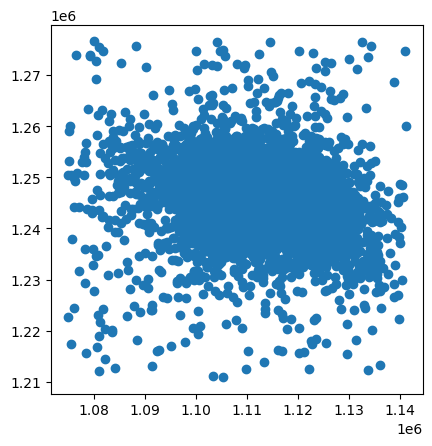

In [ ]:
gdf = gpd.GeoDataFrame(data= df_ISC, geometry=puntosSismos)
gdf.to_crs(epsg='3116', inplace=True)
gdf.plot()

<Axes: >

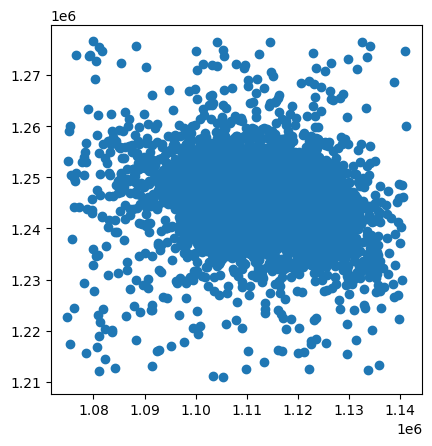

In [ ]:
gdf_m25 = gdf[gdf['MAG ']>=2.5].copy()
gdf_m25.plot()

In [ ]:
gdf_m25['X'] = gdf_m25.get_coordinates()['x']
gdf_m25['Y'] = gdf_m25.get_coordinates()['y']

# Graphic

In [ ]:
years = np.arange(1963, 2025)
eventsPerYear = {}

for year in years:
  filtroYears =gdf_m25['DATE      '].dt.year==year
  nE = filtroYears.sum()
  #eventsPerYear[year] = nE
  df_Temp = gdf_m25[filtroYears].copy()
  filtro_menos100km = df_Temp['DEPTH']<100
  filtro_mas100km = df_Temp['DEPTH']>=100

  #fig = plt.figure(figsize=(5.5,5.5))
  fig = plt.figure(figsize=(10,5.5))

  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  # ISC
  # Eventos < 100 km
  ax1.scatter(df_Temp['X'][filtro_menos100km],
             df_Temp['Y'][filtro_menos100km],
             s= 2, c='k', label='Prof. $<100$ km [{} eventos]'.format(sum(filtro_menos100km)))
  # Eventos >= 100 km
  ax1.scatter(df_Temp['X'][filtro_mas100km],
             df_Temp['Y'][filtro_mas100km],
             s= 2, c='b', label='Prof. $\geq100$ km [{} eventos]'.format(sum(filtro_mas100km)))
  ax1.set_yticks(np.arange(1200000, 1280000, 10000))
  ax1.set_xticks(np.arange(1060000, 1150000, 10000))
  ax1.set_ylim(1210580, 1277080)
  ax1.set_xlim(1074938, 1141140)
  ax1.legend(loc='lower left',fontsize=10)
  #ax1.set_aspect('auto')
  cx.add_basemap(ax=ax1,
                  crs='epsg:3116', # el sistema de coordenadas
                  source=xyz.OpenTopoMap,
                  reset_extent=True,
                  attribution_size=2) # Para incluir un mapa base

  ax1.grid(color='grey', ls='--', alpha=1)
  ax1.set_title(f'ISC [Ml $\geq 2.5$]: {nE} eventos', fontsize=10)

  # SGC
  filtroYears =gdfSGC['Date-Time'].dt.year==year
  nE = filtroYears.sum()
  #eventsPerYear[year] = nE
  df_Temp = gdfSGC[filtroYears].copy()
  filtro_menos100km = df_Temp['PROFUNDIDAD (Km)']<100
  filtro_mas100km = df_Temp['PROFUNDIDAD (Km)']>=100

  # Eventos < 100 km
  ax2.scatter(df_Temp['X'][filtro_menos100km],
             df_Temp['Y'][filtro_menos100km],
             s= 2, c='k', label='Prof. $<100$ km [{} eventos]'.format(sum(filtro_menos100km)))
  # Eventos >= 100 km
  ax2.scatter(df_Temp['X'][filtro_mas100km],
             df_Temp['Y'][filtro_mas100km],
             s= 2, c='b', label='Prof. $\geq100$ km [{} eventos]'.format(sum(filtro_mas100km)))
  ax2.set_yticks(np.arange(1200000, 1280000, 10000))
  ax2.set_xticks(np.arange(1060000, 1150000, 10000))
  ax2.set_ylim(1210580, 1277080)
  ax2.set_xlim(1074938, 1141140)
  ax2.legend(loc='lower left',fontsize=10)
  ax2.set_yticklabels([])
  #ax1.set_aspect('auto')
  cx.add_basemap(ax=ax2,
                  crs='epsg:3116', # el sistema de coordenadas
                  source=xyz.OpenTopoMap,
                  reset_extent=True,
                  attribution_size=2) # Para incluir un mapa base

  ax2.grid(color='grey', ls='--', alpha=1)
  ax2.set_title(f'SGC [Ml $\geq 2.5$]: {nE} eventos', fontsize=10)

  ax1.set_ylabel('Y [m]', fontsize=10)
  ax1.set_xlabel('X [m]', fontsize=10)
  ax2.set_xlabel('X [m]', fontsize=10)

  plt.suptitle(f'Año {year}', fontsize=10)
  plt.tight_layout()
  plt.savefig((pathSaveFiguras + f'mapaISC_{year}.png'),
              format='png', dpi=300, bbox_inches = 'tight',pad_inches=0.25)
  plt.show()
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

# Video figures

In [ ]:
from moviepy.editor import ImageSequenceClip

In [ ]:
pathSaveFiguras = '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/FigurasV7/'

In [ ]:
# Crear una secuencia de imágenes para el video
image_files = []
for year in range(1963, 2025):
  filePng = pathSaveFiguras + 'mapaISC_' + str(year) + '.png'
  image_files.append(filePng)
image_files

['/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/FigurasV7/mapaISC_1963.png',
 '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/FigurasV7/mapaISC_1964.png',
 '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/FigurasV7/mapaISC_1965.png',
 '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/FigurasV7/mapaISC_1966.png',
 '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/FigurasV7/mapaISC_1967.png',
 '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/FigurasV7/mapaISC_1968.png',
 '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/FigurasV7/mapaISC_1969.png',
 '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/FigurasV7/mapaISC_1970.png',
 '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/FigurasV7/mapaISC_1971.png',
 '/content/drive/MyDrive/Manuscritos_Investigacion/ML_S

In [ ]:
# Crear el video utilizando MoviePy
clip = ImageSequenceClip(image_files, fps=2)  # 1 imagen por segundo
clip.write_videofile('videoSismos_ISC_SGC_ml25.mp4', codec='libx264')

Moviepy - Building video videoSismos_ISC_SGC_ml25.mp4.
Moviepy - Writing video videoSismos_ISC_SGC_ml25.mp4



Moviepy - Done !
Moviepy - video ready videoSismos_ISC_SGC_ml25.mp4


# End